## Euler's Method

### Algorithm

```
Function will take following input:(f,t_initial,t_final,y_initial,h)
f(t,y) from y'= f(t,y)
t_initial(starting point of domain)
t_final(ending point of domain)
y_initial(initial condition)
h(step size)


1 Initialize the initial value of y and the initial time t.

2 Set the number of steps n = (t_final - t_initial) / h.

3 Loop from i = 1 to i = n:
  a. Calculate the slope of the function at the current time and value of y     using the given differential equation.
  b. Calculate the new value of y using the formula: y(i) = y(i-1) + h * slope(i-1).
  c. Update the value of time t(i) = t(i-1) + h.

4 Return the values of time and y at each step.
```




In [ ]:
def euler_method(f, t_initial, t_final, y_initial, h, WRITE = 1):
    """
    Solves the ordinary differential equation y' = f(t, y) using Euler's method with step size h.
    Returns arrays of time and y values at each step.
    """
    num_steps = int((t_final - t_initial) / h)
    t_values = [t_initial]
    y_values = [y_initial]
    if(WRITE == 1): 
      print('\n-------SOLUTION-------')
      print('----------------------')    
      print('#\ttn\tyn')
      print('----------------------')
    for i in range(num_steps):
        slope = f(t_values[i], y_values[i])
        y_new = y_values[i] + h * slope
        t_new = t_values[i] + h
        y_values.append(y_new)
        t_values.append(t_new)
        if(WRITE == 1):
          print('%d\t%.2f\t%.4f'% (i+1,t_new,y_new) )
          print('----------------------')
    return t_values,y_values


In [ ]:
import numpy as np
def f(t,y):
  return np.exp(t-y)

t_E,y_E=euler_method(f, 0, 1, 1,0.1)


-------SOLUTION-------
----------------------
#	tn	yn
----------------------
1	0.10	1.0368
----------------------
2	0.20	1.0760
----------------------
3	0.30	1.1176
----------------------
4	0.40	1.1618
----------------------
5	0.50	1.2085
----------------------
6	0.60	1.2577
----------------------
7	0.70	1.3095
----------------------
8	0.80	1.3639
----------------------
9	0.90	1.4208
----------------------
10	1.00	1.4802
----------------------


## RK-4 Method

### Algorithm

To solve:$\dfrac{dy}{dx}=f(x,y)$

$x_{i+1} = x_i + h,\\y_{i+1} = y_i + \frac{1}{6}(k_1+2k_2+2k_3+k_4)h\\ k_1 = \ f(x_i, y_i),\\ k_2 =  f(x_i + 0.5h, y_i + 0.5 k_1),\\ k_3 =  f(x_i + 0.5h, y_i + 0.5 k_2).\\ k_4 = f(x_i + h, y_i + k_3),
 \\ $

```
Function will take following input:(f,t_initial,t_final,y_initial,h)
f(t,y) from y'= f(t,y)
t_initial(starting point of domain)
t_final(ending point of domain)
y_initial(initial condition)
h(step size)


1 Initialize the initial value of y and the initial time t.

2 Set the number of steps n = (t_final - t_initial) / h.

3 Loop from i = 1 to i = n:
  a)Calculate
      k1 =  f(x0, y0)
      k2 =  f(x0+h/2, y0+k1/2)
      k3 =  f(x0+h/2, y0+k2/2)
      k4 =  f(x0+h, y0+k3)

  b) Calculate the new value of y using the formula: y(i) = y(i-1) + (k1+2*k2+2*k3+k4)*h/6
  c) Update the value of time t(i) = t(i-1) + h.

4 Return the values of time and y at each step.
```

In [ ]:
def RK4_method(f, t_initial, t_final, y_initial, h, WRITE = 1):
    """
    Solves the ordinary differential equation y' = f(t, y) using Euler's method with step size h.
    Returns arrays of time and y values at each step.
    """
    num_steps = int((t_final - t_initial) / h)
    t_values = [t_initial]
    y_values = [y_initial]
    if(WRITE == 1):
      print('\n-------SOLUTION-------')
      print('----------------------')    
      print('#\ttn\tyn')
      print('----------------------')
    for i in range(num_steps):
        k1 = f(t_values[i], y_values[i])
        k2 = f(t_values[i]+0.5*h, y_values[i]+0.5*k1)
        k3 = f(t_values[i]+h/2, y_values[i]+k2/2)
        k4 = f(t_values[i]+h, y_values[i]+k3)
        y_new = y_values[i] + (h/6) * (k1+2*k2+2*k3+k4)
        t_new = t_values[i] + h
        y_values.append(y_new)
        t_values.append(t_new)
        if(WRITE == 1):
          print('%d\t%.2f\t%.4f'% (i+1,t_new,y_new) )
          print('----------------------')
    return t_values,y_values


In [ ]:
import numpy as np
def f(t,y):
  return np.exp(t-y)

t_R,y_R=RK4_method(f, t_initial=0, t_final=1, y_initial=1,h= 0.1)


-------SOLUTION-------
----------------------
#	tn	yn
----------------------
1	0.10	1.0327
----------------------
2	0.20	1.0673
----------------------
3	0.30	1.1039
----------------------
4	0.40	1.1425
----------------------
5	0.50	1.1831
----------------------
6	0.60	1.2257
----------------------
7	0.70	1.2703
----------------------
8	0.80	1.3170
----------------------
9	0.90	1.3657
----------------------
10	1.00	1.4164
----------------------


## Library Function to solve ODE(IVP)

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
def f(t,y):
  return np.exp(t-y)
sol = solve_ivp(f, [0, 1], [1], t_eval=np.array(np.linspace(0.1,1,10)))
t_l=sol.t
y_l=sol.y.flatten()
print('\n----Library_SOLUTION-------')
print('----------------------')    
print('#\ttn\tyn')
print('----------------------')

for i in range(len(t_l)):
   print('%d\t%.2f\t%.4f'% (i+1,t_l[i],y_l[i]) )
   print('----------------------')
   


----Library_SOLUTION-------
----------------------
#	tn	yn
----------------------
1	0.10	1.0380
----------------------
2	0.20	1.0783
----------------------
3	0.30	1.1211
----------------------
4	0.40	1.1663
----------------------
5	0.50	1.2140
----------------------
6	0.60	1.2642
----------------------
7	0.70	1.3169
----------------------
8	0.80	1.3721
----------------------
9	0.90	1.4298
----------------------
10	1.00	1.4899
----------------------


In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
def f(t,y):
  return np.exp(t-y)
sol = solve_ivp(f, [0, 1], [1], t_eval=np.array(np.linspace(0.1,1,10)))
print(sol.y.flatten())
print(sol.t)
y_l=sol.y.flatten()
t_l=sol.t

[1.03796051 1.07830121 1.12106759 1.16629685 1.21401355 1.26422954
 1.3169439  1.37214301 1.42980049 1.48987724]
[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


## Plotting 

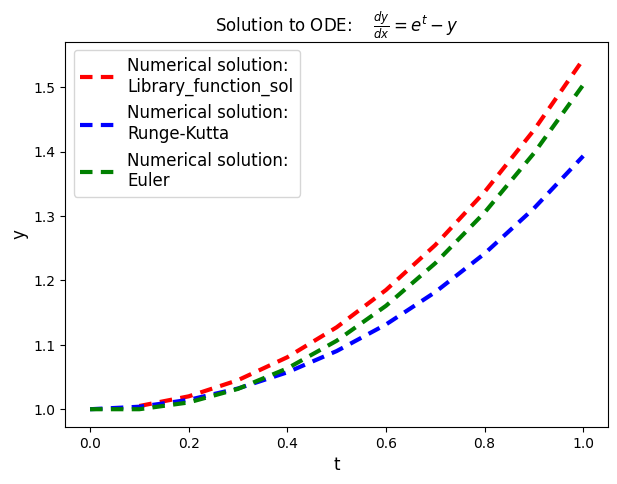

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(7,5))


plt.plot(t_l, y_l, label="Numerical solution:\nLibrary_function_sol", dashes=(3,2), color="red",lw=3)
plt.plot(t_R, y_R, label="Numerical solution:\nRunge-Kutta", dashes=(3,2), color="blue",lw=3)
plt.plot(t_E, y_E, label="Numerical solution:\nEuler", dashes=(3,2), color="green",lw=3)

plt.legend(loc="best", fontsize=12)
plt.title(r"Solution to ODE: $\quad\frac{dy}{dx}=e^t -y$")
plt.xlabel("t", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.show()


##Lab Task
```
1- Write the program for Heun's Method.
2- Write the code to make a table to compare error of Heun's, Euler's, RK4 by using analytical solution.
3- Repeat task 2 for three different DEs.



In [ ]:
#________________________________Task1___________________________________
#Heun's Method
import numpy as np

def f(t,y):
  return np.exp(t-y)

def Heuns_method(f, t_initial, t_final, y_initial, h, WRITE = 1):
    num_steps = int((t_final - t_initial) / h)
    t_values = [t_initial]
    y_values = [y_initial]
    if(WRITE == 1): 
      print('\n-------SOLUTION-------')
      print('----------------------')    
      print('#\ttn\tyn')
      print('----------------------')
    for i in range(num_steps):
        k1 = f(t_values[i], y_values[i])
        k2 = f(t_values[i]+h, y_values[i]+h*k1)
        y_new = y_values[i] + (h/2) * (k1+k2)
        t_new = t_values[i] + h
        y_values.append(y_new)
        t_values.append(t_new)
        if(WRITE == 1):
          print('%d\t%.2f\t%.4f'% (i+1,t_new,y_new) )
          print('----------------------')
    return t_values,y_values

In [ ]:
#________________________________Task2___________________________________
def CompareMethods(f, t_initial, t_final, y_initial, h):
  Eulerx, Eulery = euler_method(f, t_initial, t_final, y_initial, h, 0)
  Heunsx, Heunsy = Heuns_method(f, t_initial, t_final, y_initial, h, 0)
  RK4x  , RK4y   = RK4_method(f, t_initial, t_final, y_initial, h, 0)
  sol = solve_ivp(f, [t_initial, t_final], [y_initial], t_eval=np.array(np.linspace(h,1,int((t_final - t_initial) / h))))
  t_l=sol.t
  y_l=sol.y.flatten()
  print('\t\tError Table')
  print('----------------------------------------------')  
  print('  #\t  t\t Heun\'s\t  Euler\t    RK4')
  print('----------------------------------------------')  
  for i in range(int((t_final - t_initial) / h)):
    print('  %d\t%.2f\t%.4f\t %.4f  %.4f'% (i+1, t_l[i], abs(Heunsy[i+1]-y_l[i]), abs(Eulery[i+1]-y_l[i]), abs(RK4y[i+1]-y_l[i])))
    print('----------------------------------------------')
  print('\n\n')


In [ ]:
#________________________________Task3___________________________________
def f(t,y):
  return np.cos(2*t) + np.sin(3*t)
CompareMethods(f, t_initial=0, t_final=1, y_initial=1,h= 0.1)

def f(t,y):
  return t*np.exp(3*t) - 2*y
CompareMethods(f, t_initial=0, t_final=1, y_initial=0,h= 0.1)

		Error Table
----------------------------------------------
  #	  t	 Heun's	  Euler	    RK4
----------------------------------------------
  1	0.10	0.0005	 0.0143  0.0001
----------------------------------------------
  2	0.20	0.0025	 0.0268  0.0014
----------------------------------------------
  3	0.30	0.0043	 0.0347  0.0024
----------------------------------------------
  4	0.40	0.0046	 0.0360  0.0018
----------------------------------------------
  5	0.50	0.0039	 0.0307  0.0001
----------------------------------------------
  6	0.60	0.0032	 0.0200  0.0015
----------------------------------------------
  7	0.70	0.0036	 0.0052  0.0018
----------------------------------------------
  8	0.80	0.0052	 0.0125  0.0009
----------------------------------------------
  9	0.90	0.0063	 0.0337  0.0001
----------------------------------------------
  10	1.00	0.0064	 0.0574  0.0001
----------------------------------------------



		Error Table
----------------------------------------------
  #	 